# 統計PTT每日

In [1]:
# -*- coding: utf-8 -*-
#https://plot.ly/python/ipython-notebook-tutorial/
# pip install plotly
# conda install -c anaconda nbformat
# conda install -c conda-forge nbformat

import pymongo as mg
import datetime
import plotly
from datetime import datetime, timedelta

%config IPCompleter.greedy=True

#ECHO ptt Start ====================================
fetchdays = 1
yesterday_temp = datetime.now() - timedelta(days = fetchdays)
yesterday_date = yesterday_temp.strftime("%Y-%m-%d")
today_date = datetime.now().strftime("%Y-%m-%d")
ary1 = str(yesterday_date).split("-")
start = datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 0, 0, 0)
ary1 = str(today_date).split("-")
end =  datetime(int(ary1[0]),int(ary1[1]),int(ary1[2]), 23, 59, 59)
#debug
start = datetime(2020, 10, 8, 0, 0, 0)
end = datetime(2020, 11, 15, 23, 59, 59)
client = mg.MongoClient('127.0.0.1:27017')
db = client["ptt"]
col = db['Gossiping']
sort = [("date", -1)]
result = col.find({"date":{'$gte': start, '$lte': end}})
#result = col.find({"date":{'$gte': start, '$lte': end}}).limit(100)
#result = col.find({"date":{'$gte': start, '$lte': end}}).sort(sort).limit(100)
# result = col.find({"date":{'$gte': start, '$lte': end}})
# result = col.find({"url":"https://www.ptt.cc/bbs/Gossiping/M.1507319547.A.8CF.html","date":{'$gte': start, '$lte': end} })
result  =  list(result)
#ECHO ptt End ====================================


#Own ptt Start ====================================
# client = mg.MongoClient('127.0.0.1:27017')
# db = client['ptt'] #DBName: ptt
# start = datetime(2017, 9, 14, 0, 0, 0)
# end = datetime(2017, 9, 19, 23, 59, 59)
# result = db['Gossiping'].find({ 'date':{'$gte':start,'$lte':end } })
# result  =  list(result)
#Own ptt End ====================================

temp_dict = {}
date_dict = {}
for x in result:
    temp_dict[ x['url'] ] = x

print ("distinct %s records found." % (len(temp_dict) ) )

post_dict = {}
post_counter = 0
last_sum = 0
for x in temp_dict:
    last_sum = 0
    post_counter = 0
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    try:
        last_sum = post_dict[dt]['counter']
        post_dict[dt]={'counter':last_sum+1}
    except Exception as e:
        post_counter = post_counter+1
        post_dict[dt]={'counter':post_counter}
        pass

x_axis = []
y_axis = []
for x in post_dict:
    x_axis.append(x)
    y_axis.append(post_dict[x]['counter'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

distinct 58 records found.
['2020-10-11', '2020-10-21', '2020-10-23', '2020-10-24']
[2, 1, 1, 54]


In [2]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日發文數統計"
        }
    })

In [3]:
tmp_score = 0
lastSumScore = 0
for x in temp_dict:
    dt = temp_dict[x]["date"].strftime("%Y-%m-%d")
    #print(dt)
    try:
        #print(temp_dict[x]['comments'])
        score = 0
        for y in list(temp_dict[x]['comments']):
            try:
                lastSumScore = date_dict[dt]['score']
                score = lastSumScore+y['score']
                date_dict[dt]={'date':dt,'score':score}
            except Exception as e:
                score = y['score']
                date_dict[dt]={'date':dt,'score':score}
                pass
    except Exception as e:
        #print('Exception:'+str(e))
        pass
#print(date_dict)
x_axis = []
y_axis = []
for x in date_dict:
    x_axis.append(x)
    y_axis.append(date_dict[x]['score'])

zipped = zip(x_axis, y_axis)
x_axis = []
y_axis = []
zipped = sorted(zipped, key=lambda x: x[0])
for x in zipped:
    x_axis.append(x[0])
    y_axis.append(x[1])
print(x_axis)
print(y_axis)

['2020-10-11', '2020-10-21', '2020-10-23', '2020-10-24']
[45, 9, 30, 192]


In [4]:
plotly.offline.init_notebook_mode(connected=True)
plotly.offline.iplot({
        "data": [{
                "x": x_axis,
                "y": y_axis
            }],
        "layout": {
            "title": "David PTT 八卦版每日互動(推-噓)觀察"
        }
    })


## Visualization

In [5]:
result[:1]

[{'_id': ObjectId('5f931cb2c977c309c738cebe'),
  'board': 'Gossiping',
  'title': '[問卦]  阿姨ㄧ直問「帥哥，聖傑勒？」',
  'author': 'boxoxox',
  'content': '\n\n剛剛朋友 出門買個宵夜的時候\n\n走在騎樓時遇到有個蠻漂亮的阿姨問他\n\n「帥哥，聖傑勒？」\n\n我朋友猜應該是阿姨叫勝傑的小孩走丟了\n\n才再半夜看到人就問\n\n不過看我朋友沒什麼反應\n\n阿姨好像也著急了 拉著我朋友手不放\n\n好像是想帶我朋友進她家看聖傑照片\n\n\n但畢竟什麼資訊都沒有\n\n朋友只能先安撫阿姨說\n\n「大姐別擔心，我會想辦法幫你找找聖傑」\n\n但聽完這句話，阿姨就像看到神經病ㄧ樣\n\n直接走開，嘴裡還ㄧ直碎碎念\n\n搞的我朋友現在滿頭疑惑\n\n\n\n是我朋友搞錯什麼了嗎？有掛\n\n--\n',
  'date': datetime.datetime(2020, 10, 24, 2, 8, 52),
  'ip': '110.54.239.220',
  'locale': '(菲律賓)',
  'comments': [],
  'score': 0,
  'url': 'https://www.ptt.cc/bbs/Gossiping/M.1603476534.A.530.html',
  'updatetime': datetime.datetime(2020, 10, 23, 11, 10, 58, 917000)}]

In [6]:
import pandas as pd

df = pd.DataFrame(result)
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url
0,5f931cb2c977c309c738cebe,boxoxox,Gossiping,[],\n\n剛剛朋友 出門買個宵夜的時候\n\n走在騎樓時遇到有個蠻漂亮的阿姨問他\n\n「帥哥...,2020-10-24 02:08:52,110.54.239.220,(菲律賓),0,[問卦] 阿姨ㄧ直問「帥哥，聖傑勒？」,2020-10-23 11:10:58.917,https://www.ptt.cc/bbs/Gossiping/M.1603476534....


In [7]:
from datetime import datetime as dt

def weekday(posts):
    weekdays = []
    for post in posts:
        weekdays.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").weekday()+1)
    return weekdays

def hour(posts):
    hours = []
    for post in posts:
        hours.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").hour)
    return hours

def day(posts):
    days = []
    for post in posts:
        days.append(dt.strptime(post, "%Y-%m-%d %H:%M:%S").strftime('%Y-%m-%d'))
    return days

In [8]:
df['hour'] = hour(df['date'].astype(str))
df['weekday'] = weekday(df['date'].astype(str))
df['post_date'] = day(df['date'].astype(str))
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date
0,5f931cb2c977c309c738cebe,boxoxox,Gossiping,[],\n\n剛剛朋友 出門買個宵夜的時候\n\n走在騎樓時遇到有個蠻漂亮的阿姨問他\n\n「帥哥...,2020-10-24 02:08:52,110.54.239.220,(菲律賓),0,[問卦] 阿姨ㄧ直問「帥哥，聖傑勒？」,2020-10-23 11:10:58.917,https://www.ptt.cc/bbs/Gossiping/M.1603476534....,2,6,2020-10-24


## 周間、24小時鄉民 發文 的熱度

In [9]:
import matplotlib.pyplot as plt
import json
%matplotlib inline

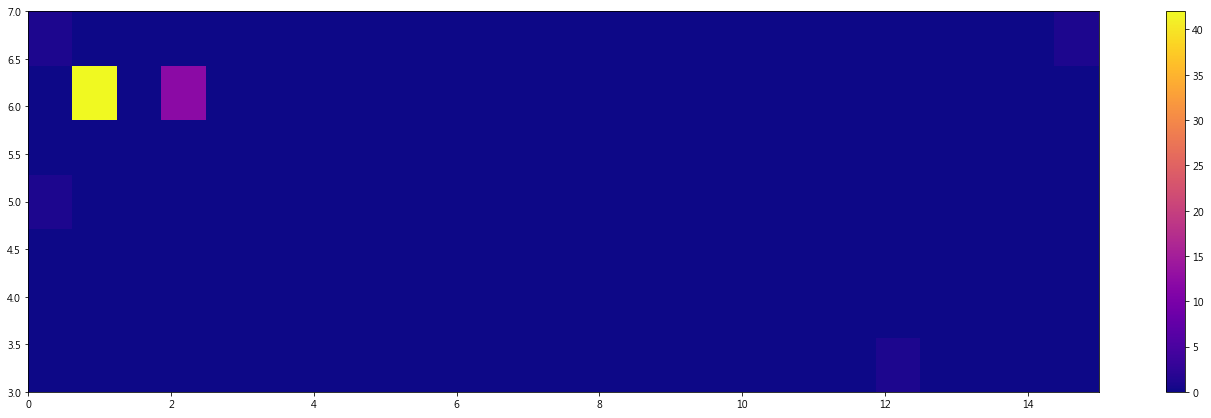

In [10]:
plt.figure(figsize=(24,7))
plt.hist2d(df['hour'], df['weekday'],bins=[24,7], label=['hi','hi'],cmap=plt.cm.plasma)
plt.colorbar()
plt.show()

### scatter by followers count and post count

In [11]:
import json

# display all comments from ptt post
# pd.set_option('display.max_colwidth', -1)

df["reaction"] = df["comments"].apply(lambda x: len(x))
#df["comment_word_count"] = df["comments"].apply(lambda x: len(x))
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction
0,5f931cb2c977c309c738cebe,boxoxox,Gossiping,[],\n\n剛剛朋友 出門買個宵夜的時候\n\n走在騎樓時遇到有個蠻漂亮的阿姨問他\n\n「帥哥...,2020-10-24 02:08:52,110.54.239.220,(菲律賓),0,[問卦] 阿姨ㄧ直問「帥哥，聖傑勒？」,2020-10-23 11:10:58.917,https://www.ptt.cc/bbs/Gossiping/M.1603476534....,2,6,2020-10-24,0


In [12]:
df["comment_raw"] = df["comments"].apply(lambda x: " ".join([word['content'].strip(': ') for word in x]))
df['comment_length'] = df["comment_raw"].apply(len)
df['comment_avg_length'] = (df["comment_length"]/df["reaction"])
df['comment_avg_length'].fillna(0, inplace=True)
df['comment_avg_length'] = df['comment_avg_length'].astype(int)
df.head(1)

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length
0,5f931cb2c977c309c738cebe,boxoxox,Gossiping,[],\n\n剛剛朋友 出門買個宵夜的時候\n\n走在騎樓時遇到有個蠻漂亮的阿姨問他\n\n「帥哥...,2020-10-24 02:08:52,110.54.239.220,(菲律賓),0,[問卦] 阿姨ㄧ直問「帥哥，聖傑勒？」,2020-10-23 11:10:58.917,https://www.ptt.cc/bbs/Gossiping/M.1603476534....,2,6,2020-10-24,0,,0,0


In [13]:
df.loc[df['comment_avg_length'] > 20]

,_id,author,board,comments,content,date,ip,locale,score,title,updatetime,url,hour,weekday,post_date,reaction,comment_raw,comment_length,comment_avg_length


In [14]:
groupbyUsermMean = df.groupby('author').mean()

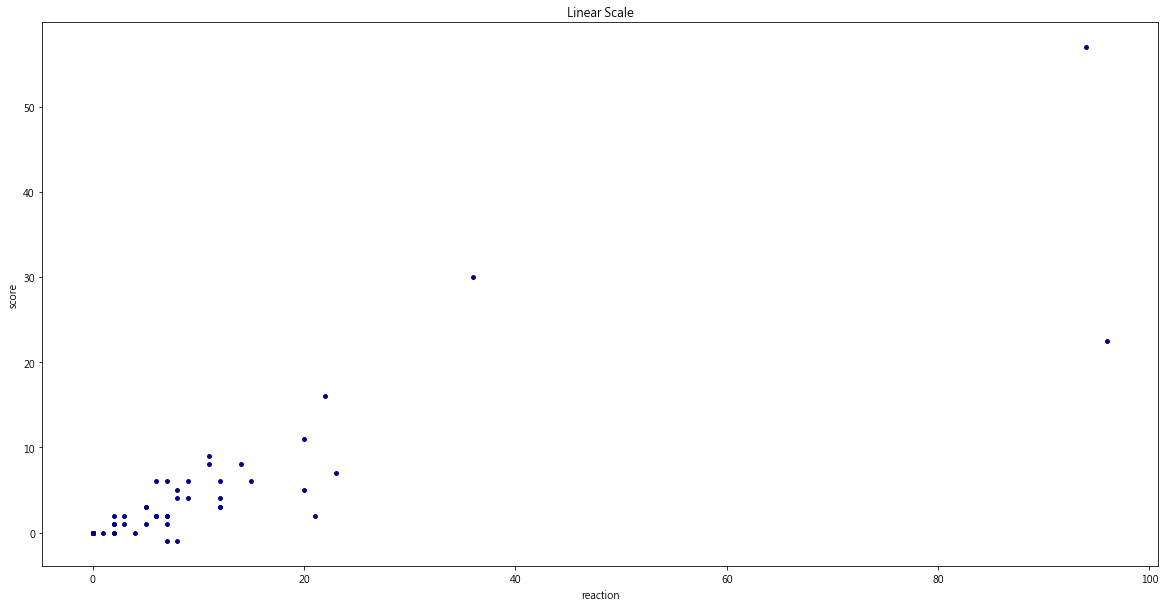

In [15]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='score',c='DarkBlue',ax=ax[1], s=15)
plt.show()

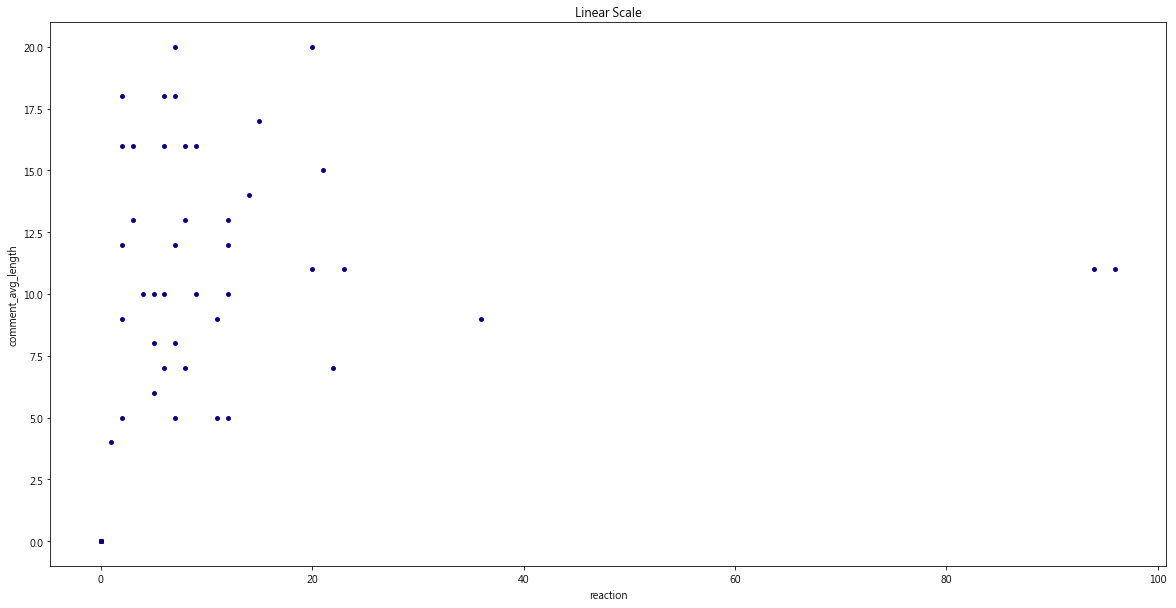

In [16]:
ax = plt.subplots(ncols=1,figsize=(20,10))
ax[1].title.set_text('Linear Scale')
groupbyUsermMean.plot.scatter(x='reaction',y='comment_avg_length',c='DarkBlue',ax=ax[1], s=15)
plt.show()

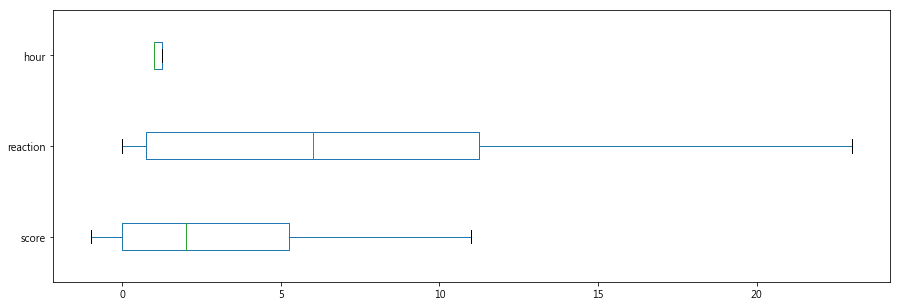

In [17]:
plot = groupbyUsermMean[['score','reaction', 'hour']].plot.box(figsize=(15,5), vert=False, showfliers=False)

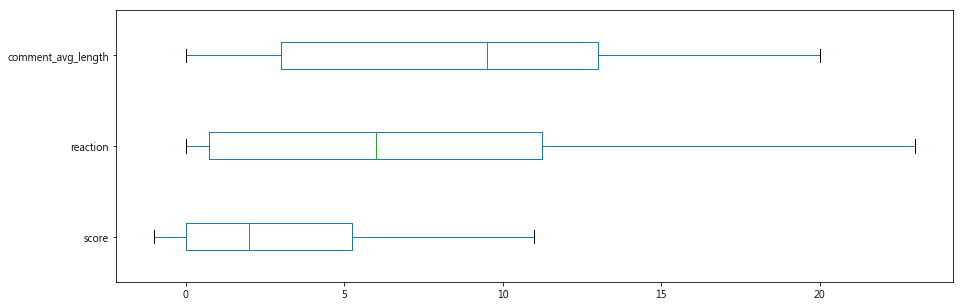

In [18]:
plot = groupbyUsermMean[['score','reaction', 'comment_avg_length']].plot.box(figsize=(15,5), vert=False, showfliers=False)

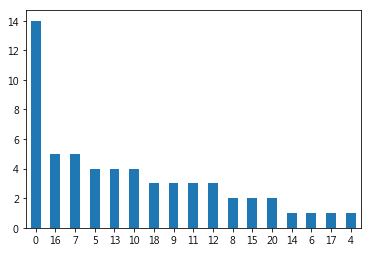

In [19]:
# 平均單則留言字數在 10 字左右
df['comment_avg_length'].value_counts().plot(kind="bar", rot=0)

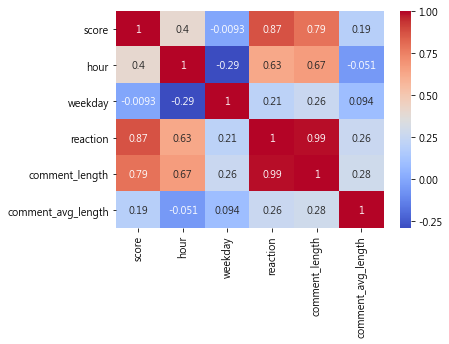

In [20]:
import seaborn as sns
%matplotlib inline

sns.heatmap(df.corr(), cmap='coolwarm', annot=True)